
 #  Probability Distribution

## PETE 2061 Lab 6

<a id='top'></a>

<a id='overview'></a>
# Topics Covered
<font color=blue>
 * [Pandas Utility Functions](#pandas) 
 * [Box Plots](#boxplots)
 * [Generating normal Distribution](#normalDist)
 * [Lognormal Distribution](#lognormalDist)    
</font>
<br>

<a id='pandas'></a>
## Pandas Utility Functions
Import standard packages

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
NpDF = pd.read_csv('Np_demo_data.csv')

print(NpDF.std())
print(type(NpDF.std()))
print(float(NpDF.std())) #converting to float downcasts the pandas series into a float.

Np    1.453735e+06
dtype: float64
<class 'pandas.core.series.Series'>
1453734.523400044


In [10]:
#Run each of these commands one after the other to see what each one does
NpDF.head()
NpDF.info()
NpDF.max()
NpDF.min()
NpDF.mean()
NpDF.median()
NpDF.mode()
NpDF.quantile([0.25,0.5,0.75])
std1 = float(NpDF.std())
print(f"std is {std1} while variance is {float(NpDF.var())}")
NpDF.quantile([0.1,0.5,0.9])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 1 columns):
Np    20001 non-null float64
dtypes: float64(1)
memory usage: 156.3 KB
std is 1453734.523400044 while variance is 2113344064525.1536


,Np
0.1,7828865.00
0.5,9631836.02
0.9,11541589.26


In [73]:
NpDF.describe()

,Np
count,2.000100e+04
mean,9.661133e+06
std,1.453735e+06
min,4.513287e+06
25%,8.671339e+06
50%,9.631836e+06
75%,1.061819e+07
max,1.549779e+07


** We use scipy to do inverse look-up of the percentile when given a realization of the random variable**

In [74]:
scipy.stats.percentileofscore(NpDF['Np'],1.15e7)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1719: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0


89.61551922403879

<a id='boxplots'></a>
## Box plot 
* A boxplot is a graphic that presents the median, the first and third quartiles, and any outliers that are present in a sample.
* The interquartile range (IQR) is the difference between the third quartile and the first quartile.
* Any point that is more than 1.5 IQR above the third quartile, or more than 1.5 IQR below the first quartile is considered an outlier. This varies from text to text.
* The plot consists of a box whose bottom side is the first quartile and whose top side is the thrid quartile.
* A horizontal line is drawn at the median.
* The outliers are plotted individually and are indicated by crosses in the figure.
* Extending from the top and bottom of the box are vertical lines called "whiskers".
* The whiskers end at the most extreme data point that is not considered an outlier.

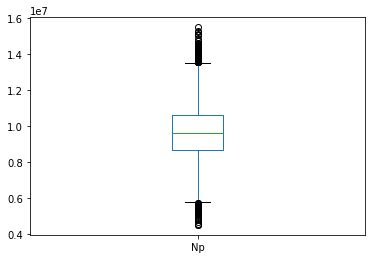

In [75]:
NpDF.plot(kind='box')

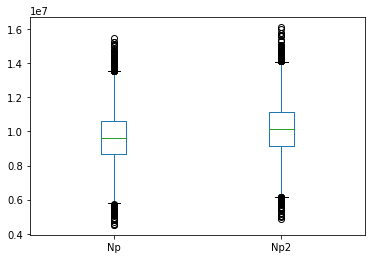

In [3]:
#Here we show that we can have multiple box plots in a Figure
NpDF['Np2'] = NpDF['Np']+1e6*np.random.rand(len(NpDF.index))
NpDF.head()
NpDF.plot(kind='box')

**Using the plot function with argument kind='hist' plots a histogram**

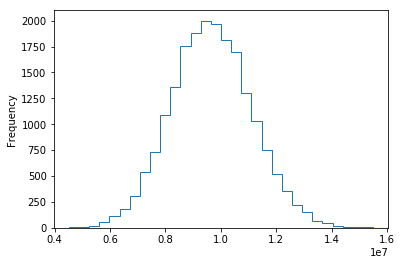

In [77]:
NpDF['Np'].plot(kind='hist',histtype='step',bins=30)  #NpDF['Np'].plot(kind='hist',bins=30)

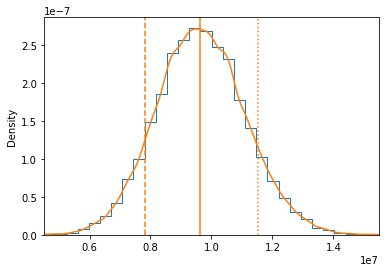

In [5]:
NpDF['Np'].plot(kind='hist', histtype='step', bins=30, density=True) #density=true normalizes the frequency so that it sums to 1
NpDF['Np'].plot.density(bw_method=0.1)   #Change the bw_method and see what happens
plt.axvline(NpDF['Np'].quantile(0.10), c='C1',linestyle='--')
plt.axvline(NpDF['Np'].quantile(0.50), c='C1')
plt.axvline(NpDF['Np'].quantile(0.90), c='C1',linestyle=':')
plt.axis(xmin=NpDF['Np'].min(),xmax=NpDF['Np'].max())
plt.savefig('outputfile.png')

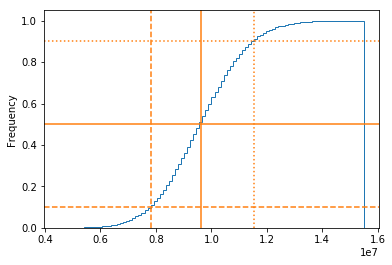

In [79]:
NpDF['Np'].plot(kind='hist', histtype='step',  bins=100, density=True, cumulative=True)
plt.axvline(NpDF['Np'].quantile(0.10), c='C1',linestyle='--')
plt.axvline(NpDF['Np'].quantile(0.50), c='C1')
plt.axvline(NpDF['Np'].quantile(0.90), c='C1',linestyle=':')
plt.axhline(0.10, c='C1',linestyle='--')
plt.axhline(0.50, c='C1')
plt.axhline(0.90, c='C1',linestyle=':')

* This CDF indicates that the probability that the cumulative oil production is less than or equal to 1.15e7 bbls is 90%
* It indicates that the probability that the cumulative oil production is less than or equal to 9.63e6 bbls is 50%
* It indicates that the probability that the cumulative oil production is less than or equal to 7.83e6 bbls is 10%
* These 3 statements can also be reworded as follows:
    * The probability that the cumulative oil production is at least 1.15e7 bbls is 10% (1-90%). Note that at least means greater than or equal to. This is referred to as the $P_{10}$ estimate in reserves management.
    * The probability that the cumulative oil production is at least 9.63e6 bbls is 50% (1-50%). This is referred to as the $P_{50}$ estimate in reserves management.
    * The probability that the cumulative oil production is at least 7.83e6 bbls is 90% (1-10%). This is referred to as the $P_{90}$ estimate in reserves management.

In [80]:
NpDF.quantile([0.1,0.5,0.9])

,Np,Np2
0.1,7828865.00,8.298155e+06
0.5,9631836.02,1.013787e+07
0.9,11541589.26,1.206776e+07


<a id='normalDist'></a>
## Generation of random numbers that are normally-distributed
* You need to specify the mean and standard deviation for a normal distribution
* The mean determines where this symmetrical distribution is centered, while the standard deviation determines the spread
* The numpy.random.normal(myMean, myStd, nSamples) generates a normal distribution, with a mean of "myMean", a standard deviation of "myStd", and a total number of samples that is equal to "nSamples".
* The numpy.random.randn(nSamples) generates nSamples from a standard normal distribution, which is a normal distribution with a mean of zero (0) and a standard deviation of unity (1).

In [10]:
#standard normal distribution example
nSamples = 10000
stdNormDistSample = np.random.randn(nSamples)  #returns nSamples from a standard normal distribution.
print(f"mean = {np.mean(stdNormDistSample)}; standard deviation = {np.std(stdNormDistSample)}")
print(f"min = {np.min(stdNormDistSample)}; max = {np.max(stdNormDistSample)}")

mean = -0.0009174374120017355; standard deviation = 0.9922304292730374
min = -3.601660670525987; max = 4.1286065165322325


In [14]:
#normal distribution example
nSamples = 10
std_poro = 0.04
mean_poro = 0.28
poro = np.random.normal(mean_poro, std_poro, nSamples) 
poro

array([0.23308174, 0.32531722, 0.29904256, 0.23788669, 0.29876724,
       0.2947566 , 0.23729121, 0.25549641, 0.31684485, 0.29989587])

<a id='lognormalDist'></a>
## Lognormal distribution

In [16]:
meanOfLogK = 1.2   #K is permeability, which is typically lognormally-distributed
stdOfLogK = 0.5
numSample = 10000
# First two arguments are the mean and standard deviation of the log of the random variable
K_sample = np.random.lognormal(meanOfLogK , stdOfLogK , numSample)
#K_sample
permDF = pd.DataFrame({'K':K_sample})
permDF.head()

,K
0,1.090738
1,3.419778
2,2.703546
3,2.163664
4,4.381828


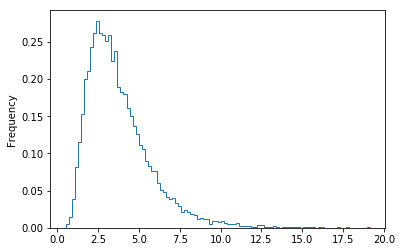

In [17]:
permDF['K'].plot(kind='hist', histtype='step', bins=100, density=True) 

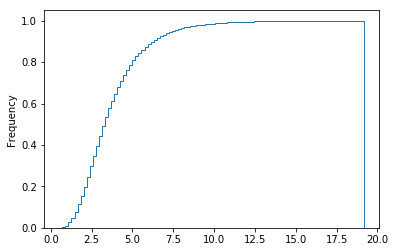

In [18]:
permDF['K'].plot(kind='hist', histtype='step', bins=100, density=True, cumulative=True) 

<a id='scipyDist'></a>
## Probability Distributions in Scipy.stats

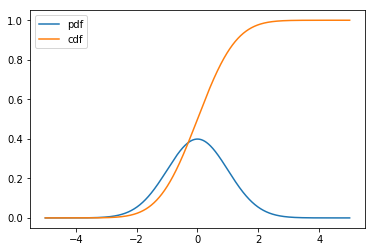

In [19]:
import scipy.stats as ss
X = np.linspace(-5, 5, 5000)   #x is your random variable. What does this line do?
mu,sigma = 0,1    #what kind or normal distribution has a mean of 0 and a standard deviation of 1?

y_cdf = ss.norm.cdf(X, mu, sigma) # the normal cdf
y_pdf = ss.norm.pdf(X, mu, sigma) # the normal pdf 
# the pdf function returns the normalized frequencies corresponding to X using the equation in the lecture slides
# the cdf function integrates the pdf function numerically

plt.plot(X, y_pdf, label='pdf') 
plt.plot(X, y_cdf, label='cdf')
plt.legend();

**Effect of changing mean but keeping standard deviation constant**

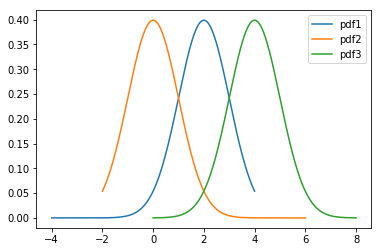

In [24]:
X = np.linspace(-4, 4, 5000) 
y_pdf = ss.norm.pdf(X,2,1) 
plt.plot(X, y_pdf, label='pdf1')

X = np.linspace(-2, 6, 5000) 
y_pdf = ss.norm.pdf(X)  #implicitly assumes mean=0, std=1
plt.plot(X, y_pdf, label='pdf2')

X = np.linspace(0, 8, 5000)  #make sure the random variable X is modified to display all data
y_pdf = ss.norm.pdf(X,4,1)
plt.plot(X, y_pdf, label='pdf3') 

plt.legend();

**Effect of changing standard deviation but keeping mean constant**

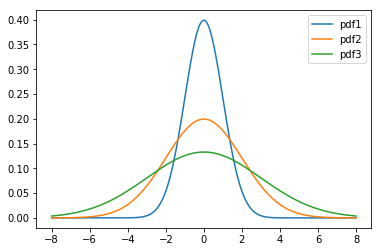

In [29]:
X = np.linspace(-8, 8, 5000) 
y_pdf = ss.norm.pdf(X,0,1) 
plt.plot(X, y_pdf, label='pdf1')

y_pdf = ss.norm(0,2).pdf(X)      # another way of using the pdf and cdf functions
plt.plot(X, y_pdf, label='pdf2')

y_pdf = ss.norm(0,3).pdf(X) 
plt.plot(X, y_pdf, label='pdf3') 

plt.legend();

In [43]:
ss.norm.cdf(0.5) #or ss.norm(0,1).cdf(0.5)  #Argument here is just one realization of the random variable X. 
#It returns the percentile corresponding to a random variable value of 0.5 in the standard normal distribution

0.6914624612740131

In [42]:
#ppf() is the percent point function. It takes in the percentile as an argument and returns the corresponding
# random variable, X. Therefore, it is an inverse of the cdf 
ss.norm.ppf(0.6914624612740131)   # or ss.norm(0,1).ppf(0.6914624612740131)

0.5000000000000001

The percentile corresponding to a value of 0.5 in the standard normal distribution is 0.6914624612740131
The percentile corresponding to a value of 0 in the standard normal distribution is 0.5


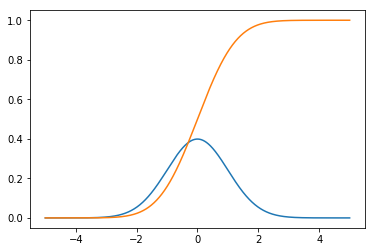

In [38]:
X = np.linspace(-5, 5, 5000) 
y_pdf = ss.norm.pdf(X) 
y_cdf = ss.norm.cdf(X)
plt.plot(X, y_pdf, label='pdf1')
plt.plot(X, y_cdf, label='cdf1')

In [44]:
print(f"The percentile corresponding to a value of 0.5 in the standard normal distribution is {ss.norm.cdf(0.5)}")
print(f"The percentile corresponding to a value of 0 in the standard normal distribution is {ss.norm.cdf(0)}")

print(f"The value at a percentile of 50% in a standard normal distribution is {ss.norm.ppf(0.5)}")
print(f"The value at a percentile of 90% in a standard normal distribution is {ss.norm.ppf(0.9)}")

The percentile corresponding to a value of 0.5 in the standard normal distribution is 0.6914624612740131
The percentile corresponding to a value of 0 in the standard normal distribution is 0.5
The value at a percentile of 50% in a standard normal distribution is 0.0
The value at a percentile of 90% in a standard normal distribution is 1.2815515655446004


**Generating Random Numbers from Different Distributions (using scipy) and Visualizing them (using seaborn)**

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Uniform Distribution ')]

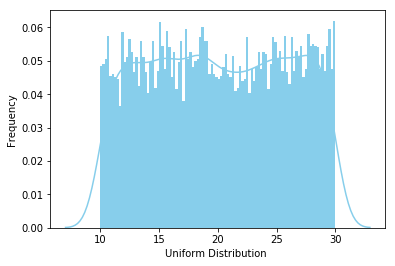

In [45]:
# import uniform distribution
#from scipy.stats import uniform
import seaborn as sns
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = ss.uniform.rvs(size=n, loc = start, scale=width)  #loc is smallest random number, and scale is range.

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Normal Distribution')]

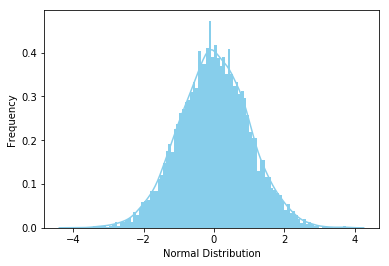

In [157]:
# generate random numbers from N(0,1)
data_normal = ss.norm.rvs(size=10000,loc=0,scale=1)  # loc is mean, and scale is std
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


**Feel free to explore several other distributions at https://www.datacamp.com/community/tutorials/probability-distributions-python and https://docs.scipy.org/doc/scipy/reference/stats.html**